# Final Project 
### DAV 5400 Spring 2019
__Maayan Raviv__
<br>
__Dean Pienica__
<br>
<br>
_First Chapter- Collecting Data Using API_ 
***

### Agenda
* Collecting the data using API from https://www.census.gov/data/developers/data-sets/popest-popproj/popest.Vintage_2017.html
* Creating a SQL DB and upload the data to Postgres host server. 

### Collecting and Cleaning the Data
We will collect data regarding US states population size in years 2010, 2013, 2015, 2016 to support our main analysis that is taking place in chapter 3. 
<br> 
This part will also include necessary data transformations operations and data clean-up.
<br>
List of operations that we performed in this step:
* State names mapping- create abbreviations for each state for example __Alabama = 'AL'__
* Create a dictionary data frame for the States' mapping.


In [1]:
import pandas as pd 
import requests
import json
from sqlalchemy import create_engine

# DB Credentials
username = "usgdheyiixdekm"
password = "8adc68f3bda8e3b2da6b171d207ede8f7d1c7acc91c340e4746aac2d33f41862"
host = "ec2-184-73-210-189.compute-1.amazonaws.com"
port = 5432
database = "d8t16vh0pkq35"

In [2]:
# We will upload pictures in this notebook to show some of the steps that has beem made outside of Jupiter notebook. 
!pip install Pillow

In [3]:
# Create abbr - state name mapping
mapping = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'DistrictofColumbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'NewHampshire': 'NH',
    'NewJersey': 'NJ',
    'NewMexico': 'NM',
    'NewYork': 'NY',
    'NorthCarolina': 'NC',
    'NorthDakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'RhodeIsland': 'RI',
    'SouthCarolina': 'SC',
    'SouthDakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'WestVirginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [4]:
# create dataframe that contains above defined mapping dictionary data
data = pd.DataFrame(list(mapping.items()), columns = ['State', 'Abbr']) 
data.head()

,State,Abbr
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


### Access to the API
First we will get data for 2016, according to the following:
* Send request.
* Edit the input-remove headers, removing spaces, adjust to dictionary, create a new column for each year.
* Attached to data frame. 

Then, we will get data for the years of 2010, 2013, 2015 same way. 
<br>
_Last_, we will create new columns to show the change in population size in percentage. 


In [5]:
# Get population 2016
url = "https://api.census.gov/data/2016/pep/population?get=POP,STATE,REGION,DATE_DESC,GEONAME&for=state" # End point to get the population data in 2016
response = requests.get(url) # Send the get request to above defined URL end point
json_res = json.loads(response.content) # convert response of the end point to json

json_res.pop(0) # Remove header of the response which contains the name of columns
print(json_res[0]) # Print the first element of the response after the header was removed

state_pop_map = dict({})
state_id_map = dict({})
for i in json_res:
    state_name_key = i[4].replace(' ', '') # this gives the state name of the record while removing all the spaces.
    state_pop_map[state_name_key] = int(i[0]) # set the population count to the dictionary key
    state_id_map[state_name_key] = i[5] # set the state id to the same dictionary key

# attach to dataframe
data['StateId'] = data['State'].apply(lambda x: state_id_map[x]) # populate a new column name state id in the dataframe
data['Population_2016'] = data['State'].apply(lambda x: state_pop_map[x]) # populate the population data in the dataframe
data.head()

['4863300', '01', '3', '7/1/2016 population_old estimate', 'Alabama', '01']


,State,Abbr,StateId,Population_2016
0,Alabama,AL,01,4863300
1,Alaska,AK,02,741894
2,Arizona,AZ,04,6931071
3,Arkansas,AR,05,2988248
4,California,CA,06,39250017


Similar to the way we access population data API for 2016, we are going to access years 2015, 2013, 2010 as follow:

In [6]:
# population 2015
url = "https://api.census.gov/data/2015/pep/population?get=POP,STATE,REGION,GEONAME&for=state"
response = requests.get(url)
json_res = json.loads(response.content)

# Remove header
json_res.pop(0)

print(json_res[0]) # Show example list

state_pop_map = dict({})
for i in json_res:
    state_pop_map[i[4]] = int(i[0])

# attach to dataframe
data['Population_2015'] = data['StateId'].apply(lambda x: state_pop_map[x])
data.head()

['4858979', '01', '3', 'Alabama, Alabama, East South Central, South, United States', '01']


,State,Abbr,StateId,Population_2016,Population_2015
0,Alabama,AL,01,4863300,4858979
1,Alaska,AK,02,741894,738432
2,Arizona,AZ,04,6931071,6828065
3,Arkansas,AR,05,2988248,2978204
4,California,CA,06,39250017,39144818


In [7]:
# population 2013
url = "https://api.census.gov/data/2013/pep/natstprc18?get=POPESTIMATE2013,STNAME&for=state"
response = requests.get(url)
json_res = json.loads(response.content)

# Remove header
json_res.pop(0)

print(json_res[0]) # Show example list

state_pop_map = dict({})
for i in json_res:
    state_pop_map[i[2]] = int(i[0])

# attach to dataframe
data['Population_2013'] = data['StateId'].apply(lambda x: state_pop_map[x])
data.head()

['4833722', 'Alabama', '01']


,State,Abbr,StateId,Population_2016,Population_2015,Population_2013
0,Alabama,AL,01,4863300,4858979,4833722
1,Alaska,AK,02,741894,738432,735132
2,Arizona,AZ,04,6931071,6828065,6626624
3,Arkansas,AR,05,2988248,2978204,2959373
4,California,CA,06,39250017,39144818,38332521


In [8]:
# population 2010
url = "https://api.census.gov/data/2000/pep/int_population?get=POP,GEONAME,DATE,DATE_DESC&for=state"
response = requests.get(url)
json_res = json.loads(response.content)

# Remove header
json_res.pop(0)

print(json_res[0]) # Show example list

state_pop_map = dict({})
for i in json_res:
    if i[2]=='12':
        state_pop_map[i[4]] = int(i[0])

# attach to dataframe
data['Population_2010'] = data['StateId'].apply(lambda x: state_pop_map[x])
data.head()

['4447207', 'Alabama', '1', '4/1/2000 population estimates base', '01']


,State,Abbr,StateId,Population_2016,Population_2015,Population_2013,Population_2010
0,Alabama,AL,01,4863300,4858979,4833722,4779736
1,Alaska,AK,02,741894,738432,735132,710231
2,Arizona,AZ,04,6931071,6828065,6626624,6392017
3,Arkansas,AR,05,2988248,2978204,2959373,2915918
4,California,CA,06,39250017,39144818,38332521,37253956


Now we have population data for 2016, 2015, 2013 and 2010 in the data frame.
<br>
We will add new column to show the change of population in 2015-2010 difference and in percentage.

In [9]:
data['PopulationChange 2015-2010'] = data['Population_2015']-data['Population_2010']
data['PopulationChangePercentage 2015-2010'] = data['PopulationChange 2015-2010']*100/data['Population_2015']
data.head()

,State,Abbr,StateId,Population_2016,Population_2015,Population_2013,Population_2010,PopulationChange 2015-2010,PopulationChangePercentage 2015-2010
0,Alabama,AL,01,4863300,4858979,4833722,4779736,79243,1.630857
1,Alaska,AK,02,741894,738432,735132,710231,28201,3.819038
2,Arizona,AZ,04,6931071,6828065,6626624,6392017,436048,6.386114
3,Arkansas,AR,05,2988248,2978204,2959373,2915918,62286,2.091395
4,California,CA,06,39250017,39144818,38332521,37253956,1890862,4.830427


### Creating a SQL DB and upload the data to Postgres host server.
This step describes how we upload the data frane to database server "Postgres", the Credentials are defined in the beginning of the jupyter script.
<br>
Before then we create a hosted server account in "Heroku", and in Postgres to store the data online. 
<br>
For the purpose of visualizing the database in a GUI, we have installed the pgAdmin 4 application and configure the connection to server.
<br>
__This step is the main new feature that we implemented in our project, before then we were using either local files or online files that were uploaded to Github platform.__
<Br> 
__Using SQL server demonstrate daily job scenarios, since in most workplaces these days that data is stored in server and in SQL DB.__  


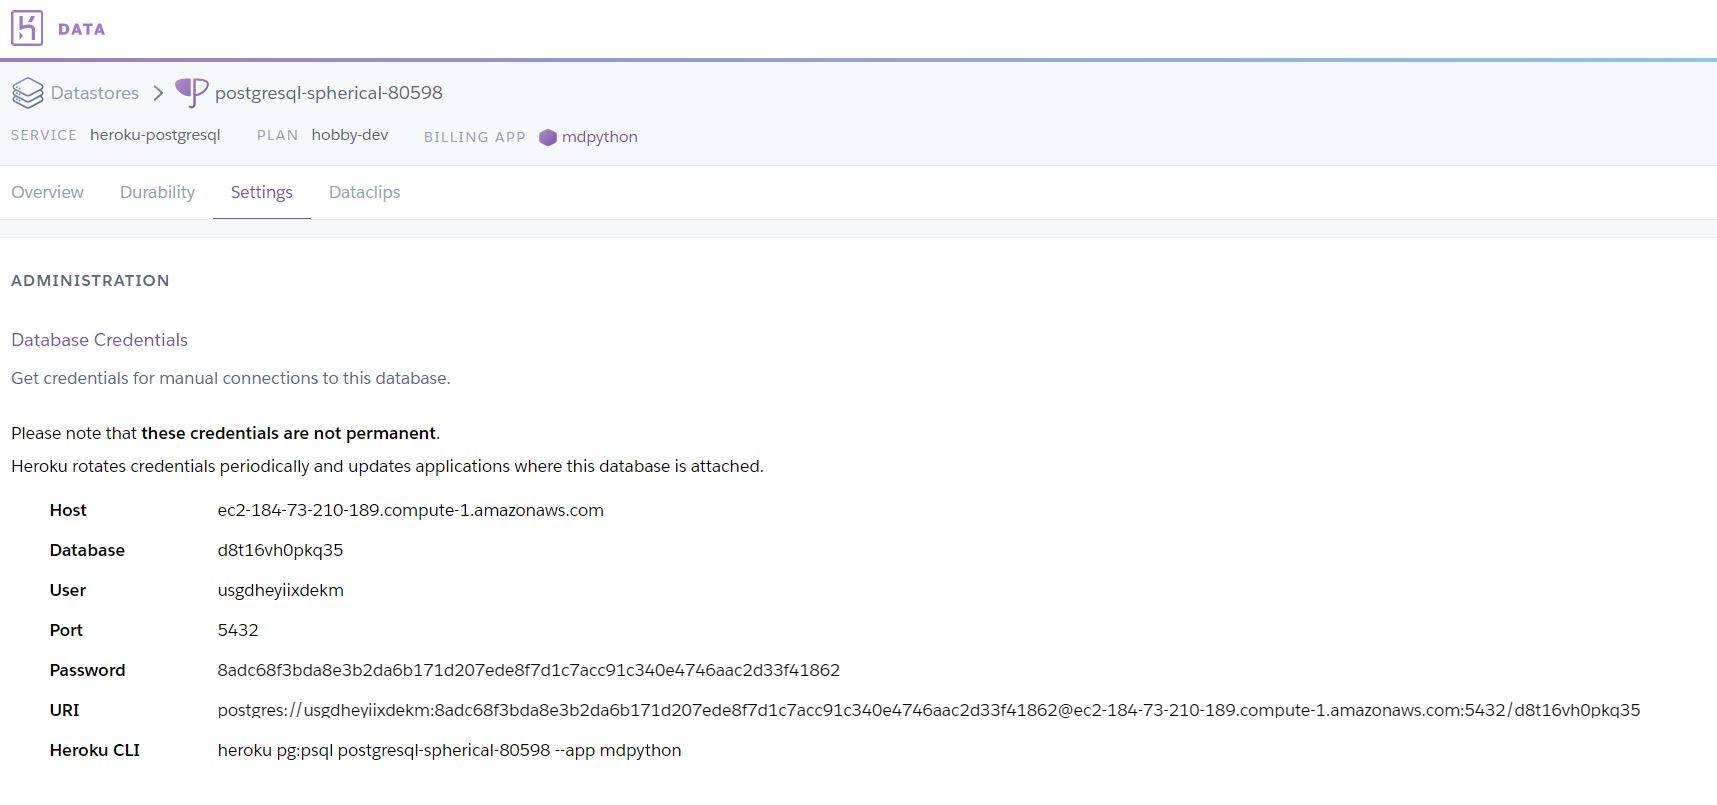

In [10]:
# DB Credentials
from IPython.display import Image
Image("./Heroku.jpg")

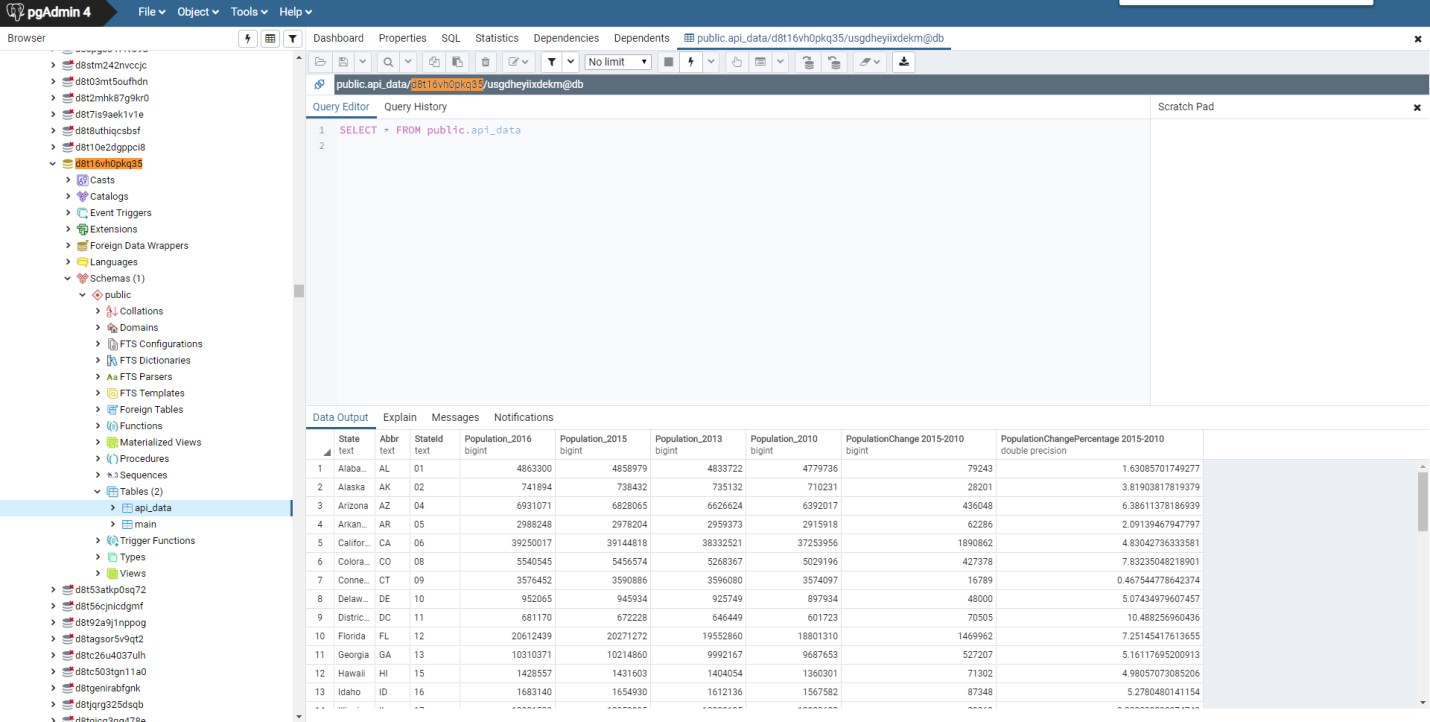

In [11]:
# DB Visualization
from IPython.display import Image
Image("./Pgadmin.jpg")

In this step we set the connection to the DB and create the API data table to hold the records.

In [12]:
engine = create_engine('postgresql://%s:%s@%s:%d/%s'%(username, password, host, port, database)) # Connect to DB
connection = engine.connect() # Get the connection object. 

# Create the api_data table
connection.execute('''
CREATE TABLE IF NOT EXISTS api_data
(
    "State" character varying(25) NOT NULL,
    "Abbr" character varying(5),
    "StateId" integer,
    "Population_2016" integer,
    "Population_2015" integer,
    "Population_2013" integer,
    "Population_2010" integer,
    "PopulationChange 2015-2010" integer,
    "PopulationChangePercentage 2015-2010" real
)
''') # Create the table in the database in order to hold the records of population

In [13]:
# Update the api_data table from the records in dataframe
data.to_sql("api_data", connection, if_exists="replace", index=False)
connection.close() # Close the connection to the database